

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>




<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>

# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

**[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]**

O propósito deste projeto é analisar e identificar as diferenças de comportamentos dos usuários dos dois planos diferentes. Cada plano tem seus limites e seus valores, portanto ao analisar o comportamento médio dos usuários pode-se ver se há o bom uso destes limites ou não. De qualquer forma, será avaliado e concluido qual plano trás mais retorno para a empresa e teremos um insight de quais são as preferências e costumes de seus clientes.


[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
# Carregando todas as bibliotecas



## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [3]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprima uma amostra de dados dos planos
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
   
A coluna `mb_per_month_included` deve estar na mesma ordem de grandeza que a coluna `usb_per_gb`, afinal a precificação ocorre sobre gigabytes de dados, e ter uma coluna como um submúltiplo da grandeza usada no preço poderá se provar inconveniente.

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [5]:
df_plans['mb_per_month_included'] = (df_plans['mb_per_month_included']/1024).astype('int')
df_plans.rename(columns = {'mb_per_month_included':'gb_per_month_included'}, inplace = True)

## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Nada a fazer.

## Usuários

In [6]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprima uma amostra de dados dos usuários
df_users.sample(10, random_state = 123)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
229,1229,Augustus,Barker,69,"Austin-Round Rock-Georgetown, TX MSA",2018-12-09,ultimate,NaN
337,1337,Lucius,Arnold,31,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-11,surf,NaN
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaN
416,1416,Deja,Moss,25,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-10-03,surf,2018-11-21
306,1306,Darron,Craig,19,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-26,surf,NaN
131,1131,Shane,Morrison,60,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-07,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
431,1431,Napoleon,Burt,74,"Sacramento–Roseville–Folsom, CA MSA",2018-01-28,surf,NaN
434,1434,Kai,Barr,18,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-06,surf,NaN
134,1134,Shannon,Nichols,71,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-03,surf,NaN


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

As colunas representantes de datas devem ser formatadas para pd.datetime e a coluna `city` pode ser separada

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [8]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')
df_users.sample(10, random_state = 123)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
229,1229,Augustus,Barker,69,"Austin-Round Rock-Georgetown, TX MSA",2018-12-09,ultimate,NaT
337,1337,Lucius,Arnold,31,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-11,surf,NaT
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaT
416,1416,Deja,Moss,25,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-10-03,surf,2018-11-21
306,1306,Darron,Craig,19,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-26,surf,NaT
131,1131,Shane,Morrison,60,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-07,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
431,1431,Napoleon,Burt,74,"Sacramento–Roseville–Folsom, CA MSA",2018-01-28,surf,NaT
434,1434,Kai,Barr,18,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-06,surf,NaT
134,1134,Shannon,Nichols,71,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-03,surf,NaT


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [9]:
df_users['area'] = df_users['city'].str.split(',', expand = True)[1]
df_users['city'] = df_users['city'].str.split(',', expand = True)[0]
df_users['area'] = df_users['area'].str.strip()
df_users = df_users.iloc[:,[0,1,2,3,4,8,5,6,7]] #reorganizando as colunas
df_users.sample(10, random_state = 123)

,user_id,first_name,last_name,age,city,area,reg_date,plan,churn_date
229,1229,Augustus,Barker,69,Austin-Round Rock-Georgetown,TX MSA,2018-12-09,ultimate,NaT
337,1337,Lucius,Arnold,31,Riverside-San Bernardino-Ontario,CA MSA,2018-03-11,surf,NaT
327,1327,Natosha,Peck,20,New York-Newark-Jersey City,NY-NJ-PA MSA,2018-02-17,surf,NaT
416,1416,Deja,Moss,25,Minneapolis-St. Paul-Bloomington,MN-WI MSA,2018-10-03,surf,2018-11-21
306,1306,Darron,Craig,19,Washington-Arlington-Alexandria,DC-VA-MD-WV MSA,2018-11-26,surf,NaT
131,1131,Shane,Morrison,60,Los Angeles-Long Beach-Anaheim,CA MSA,2018-01-07,surf,NaT
5,1005,Livia,Shields,31,Dallas-Fort Worth-Arlington,TX MSA,2018-11-29,surf,NaT
431,1431,Napoleon,Burt,74,Sacramento–Roseville–Folsom,CA MSA,2018-01-28,surf,NaT
434,1434,Kai,Barr,18,New York-Newark-Jersey City,NY-NJ-PA MSA,2018-03-06,surf,NaT
134,1134,Shannon,Nichols,71,Chicago-Naperville-Elgin,IL-IN-WI MSA,2018-09-03,surf,NaT


## Chamadas

In [10]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprima uma amostra de dados das chamadas
df_calls.sample(10, random_state = 123)

,id,user_id,call_date,duration
93277,1334_645,1334,2018-11-16,0.00
2344,1009_766,1009,2018-09-05,13.84
69558,1249_468,1249,2018-08-01,3.79
137039,1497_197,1497,2018-12-17,0.00
88437,1324_488,1324,2018-11-16,0.00
10855,1049_22,1049,2018-10-01,0.64
8232,1039_172,1039,2018-09-19,6.39
108873,1384_222,1384,2018-09-23,8.30
60555,1219_82,1219,2018-12-16,14.91
122236,1432_86,1432,2018-11-16,6.71


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Coluna `call_date` deve ser convertida para datetime e existem valores 0 na coluna `duration`, o que é estranho. Consultaria com o time da empresa o motivo destas entradas com duração zerada. 

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [12]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Nada a fazer

## Mensagens

In [13]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprima uma amostra dos dados das mensagens
df_messages.sample(10, random_state = 123)

,id,user_id,message_date
18145,1119_928,1119,2018-10-21
73094,1470_722,1470,2018-06-09
61043,1384_95,1384,2018-12-20
52330,1336_301,1336,2018-07-27
39014,1254_836,1254,2018-10-06
71538,1466_190,1466,2018-08-29
20111,1128_80,1128,2018-07-28
51582,1335_172,1335,2018-07-28
37887,1250_140,1250,2018-12-08
33553,1211_229,1211,2018-08-21


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Coluna de data para datetime

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [15]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Nada a fazer

## Internet

In [16]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
#  Imprima uma amostra de dados para o tráfego da internet
df_internet.sample(10, random_state = 123)

,id,user_id,session_date,mb_used
23621,1109_199,1109,2018-09-05,147.49
104335,1498_407,1498,2018-12-14,1130.08
29005,1132_482,1132,2018-05-25,0.00
76020,1358_107,1358,2018-07-12,567.06
53953,1244_71,1244,2018-12-25,0.00
14262,1066_152,1066,2018-05-16,510.09
95314,1444_265,1444,2018-08-25,774.83
93004,1434_240,1434,2018-08-07,0.00
65110,1299_398,1299,2018-06-12,0.00
84939,1397_177,1397,2018-10-26,509.80


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Novamente, terei que converter a data para datetime.
Agora percebo que, o dataframe com as informações dos planos estava com os dados de internet incluida no pacote formatada em MB (que eu converti para GB), porém as informações do dataframe de internet registrava os megabytes utilizados pelo usuário. isso pode trazer um problema no futuro. Ao meu ver tenho duas escolhas:
    
    - Posso desfazer minhas modificações para trabalhar com MBs inclusos no plano
    - Como constado na descrição do projeto, a cobrança ocorre por GB, sempre arredondando os MB para cima, então posso utilizar a soma dos megabytes utilizados e arredondar para cima ao calcular o preço de cobrança, assim dispensando qualquer mudança no dataframe dos planos.
Irei prosseguir com a segunda escolha. caso haja problemas, voltarei atrás.



### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [18]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Nada a fazer.

## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [19]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
df_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>



## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [20]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
df_calls['month'] = df_calls['call_date'].dt.month
calls_byuser_bymonth = df_calls.groupby(by = ['user_id', 'month'])['id'].count().reset_index() #agrupa as chamadas por usuário e por mês da chamada.
calls_byuser_bymonth #contagem das chamadas para cada mês agrupado.

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [21]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
durations = df_calls.groupby(by = ['user_id', 'month'])['duration'].sum().reset_index() #agrupa as chamadas por usuário e por mês da chamada.
durations.rename(columns = {'duration':'call_time'}, inplace = True) #renomeia a serie
durations

,user_id,month,call_time
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [22]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
df_messages['month'] = df_messages['message_date'].dt.month
messages_byuser_bymonth = df_messages.groupby(by = ['user_id', 'month'])['id'].count().reset_index()
messages_byuser_bymonth.rename(columns = {'id':'message_count'}, inplace = True) #renomeia a serie
messages_byuser_bymonth

,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [23]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
df_internet['month'] = df_internet['session_date'].dt.month
internet_byuser_bymonth = df_internet.groupby(by = ['user_id', 'month'])['mb_used'].sum().reset_index()
internet_byuser_bymonth

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

Reagregação feita na correção.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Tudo certo com as agregações.
</div>



[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Temos um problema por aqui.
    
Não necessariamente todos os clientes estãrão presentes em todos os dfs que você está juntando. 
Dessa forma devemos usar o outer join para não deixarmos usuários pelo caminho.
</div>




<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Ponto ajustado.
</div>





Segue correção:

In [24]:
# Criando novo DF
df_corrigido = df_users[['user_id', 'reg_date', 'plan']]
df_corrigido['reg_date'] = df_corrigido['reg_date'].dt.month
df_corrigido.rename(columns = {'reg_date' : 'month'}, inplace = True)
# Merging
df_corrigido = df_corrigido.merge(durations, on = ['user_id', 'month'], how = 'outer')
df_corrigido = df_corrigido.merge(messages_byuser_bymonth, on = ['user_id', 'month'], how = 'outer')
df_corrigido = df_corrigido.merge(internet_byuser_bymonth, on = ['user_id', 'month'], how = 'outer')
df_corrigido.drop(columns = 'plan', inplace = True)
df_corrigido = df_corrigido.merge(df_users[['user_id',  'plan']], on = 'user_id', how = 'left')
df_corrigido = df_corrigido.merge(df_plans, left_on = 'plan', right_on = 'plan_name', how = 'outer')

# Corrigindo nomes de coluna
df_corrigido.rename(columns = {'duration':'call_time','id':'message_count', 'mb_used':'internet_used'}, inplace = True)
df_corrigido.sort_values(by = 'user_id', inplace=True)
df_corrigido.reset_index(drop=True, inplace = True)
df_corrigido

/tmp/ipykernel_32/3842965159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrigido['reg_date'] = df_corrigido['reg_date'].dt.month
/.venv/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,user_id,month,call_time,message_count,internet_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,116.83,11.0,1901.47,ultimate,1000,30,3000,70,7,0.01,0.01,ultimate
1,1001,9,297.69,44.0,13314.82,surf,50,15,500,20,10,0.03,0.03,surf
2,1001,10,374.11,53.0,22330.49,surf,50,15,500,20,10,0.03,0.03,surf
3,1001,11,404.59,36.0,18504.30,surf,50,15,500,20,10,0.03,0.03,surf
4,1001,12,392.93,44.0,19369.18,surf,50,15,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,1499,12,468.10,NaN,22059.21,surf,50,15,500,20,10,0.03,0.03,surf
2542,1499,9,330.37,NaN,12984.76,surf,50,15,500,20,10,0.03,0.03,surf
2543,1499,5,NaN,NaN,NaN,surf,50,15,500,20,10,0.03,0.03,surf
2544,1499,11,288.56,NaN,16813.83,surf,50,15,500,20,10,0.03,0.03,surf


In [25]:
# Calcule a receita mensal para cada usuário
def monthly_revenue(row):
    # dados do usuário
    user_plan = row['plan']
    user_call = row['call_time']
    user_message = row['message_count']
    user_internet = row['internet_used']/1024
    # limites incluidos no plano do usuário
    plan_call = row['minutes_included']
    plan_message = row['messages_included']
    plan_internet = row['gb_per_month_included']
    # preços do plano do usuário
    plan_price = row['usd_monthly_pay']
    call_price = row['usd_per_minute']
    message_price = row['usd_per_message']
    internet_price = row['usd_per_gb']

    if user_call > plan_call:
        call_revenue = (user_call - plan_call) * call_price
    else:
        call_revenue = 0
    if user_message > plan_message:
        message_revenue = (user_message - plan_message) * message_price
    else:
        message_revenue = 0
    if user_internet > plan_internet:
        internet_revenue = np.ceil(user_internet - plan_internet) * internet_price
    else:
        internet_revenue = 0
    user_revenue = plan_price + call_revenue + message_revenue + internet_revenue
    return user_revenue
df_corrigido['monthly_revenue'] = df_corrigido.apply(monthly_revenue, axis = 1)
df_megaline = df_corrigido # Renomeando
df_megaline.sample(10, random_state = 123)

,user_id,month,call_time,message_count,internet_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
1413,1270,12,264.46,28.0,24633.93,ultimate,1000,30,3000,70,7,0.01,0.01,ultimate,70.0000
1578,1312,7,337.71,23.0,27213.75,surf,50,15,500,20,10,0.03,0.03,surf,140.0000
2155,1415,2,NaN,NaN,NaN,surf,50,15,500,20,10,0.03,0.03,surf,20.0000
830,1159,11,813.42,94.0,13825.28,ultimate,1000,30,3000,70,7,0.01,0.01,ultimate,70.0000
2037,1397,6,753.72,NaN,17000.58,surf,50,15,500,20,10,0.03,0.03,surf,47.6116
1335,1257,11,707.53,25.0,20401.55,surf,50,15,500,20,10,0.03,0.03,surf,76.2259
1881,1365,9,1066.08,48.0,6785.66,surf,50,15,500,20,10,0.03,0.03,surf,36.9824
184,1042,11,285.82,NaN,9287.95,surf,50,15,500,20,10,0.03,0.03,surf,20.0000
585,1113,8,522.22,37.0,15330.51,ultimate,1000,30,3000,70,7,0.01,0.01,ultimate,70.0000
1375,1263,4,605.54,2.0,12264.90,surf,50,15,500,20,10,0.03,0.03,surf,23.1662


Agora todos os usuários registrados estão presentes no dataframe
Antes da correção, haviam usuários que não consumiram nenhum produto durante o mês e, portanto, foram excluidos da análise. Este problema foi resolvido.

## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

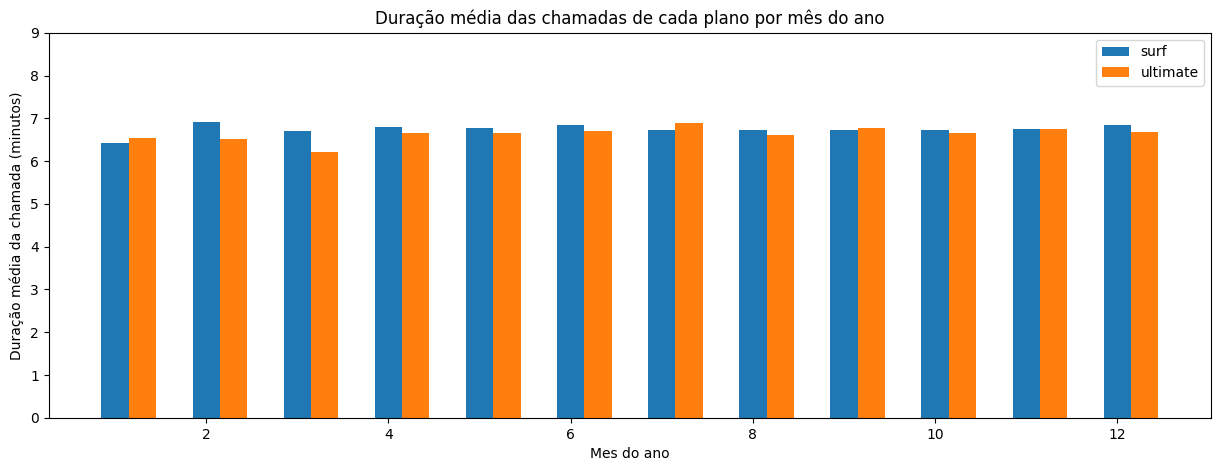

In [26]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.
# Dados para as montagens dos gráficos
ind = np.arange(1,13)
width = 0.3
# Separação de dados
calls_by_plan = df_calls.merge(df_users[['plan', 'user_id']], on = 'user_id')
surf_calls_mean = calls_by_plan[calls_by_plan['plan'] == 'surf'].groupby('month')['duration'].mean()
ultimate_calls_mean = calls_by_plan[calls_by_plan['plan'] == 'ultimate'].groupby('month')['duration'].mean()
# Plotagem
fig, ax1 = plt.subplots(figsize = (15,5))
plt.bar(ind, surf_calls_mean, width = width, label='surf ')
plt.bar(ind + width, ultimate_calls_mean, width = width, label='ultimate ')
# Configurações finais
plt.legend(['surf', 'ultimate'])
plt.ylabel('Duração média da chamada (minutos)')
plt.ylim(0,9)
plt.xlabel('Mes do ano')
plt.title('Duração média das chamadas de cada plano por mês do ano')

plt.show()

[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

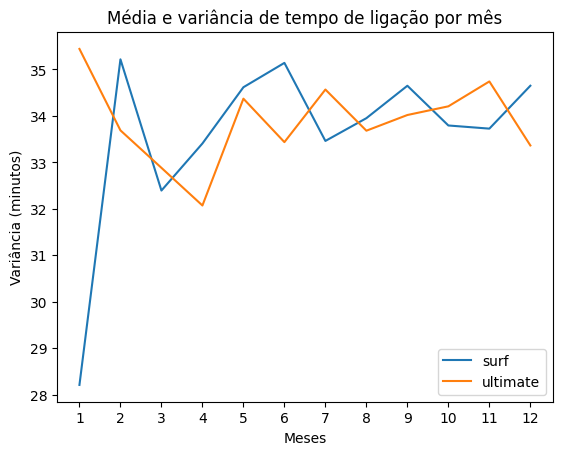

In [27]:
# Calcule a média e a variância da duração mensal das chamadas
var_duration = calls_by_plan.groupby( by = ['plan', 'month'])['duration'].var()
mean_duration = calls_by_plan.groupby( by = ['plan', 'month'])['duration'].mean()
var_mean = pd.DataFrame(mean_duration).rename(columns = {'duration' : 'Mean'})
var_mean['Variance'] = var_duration

var_mean['Variance'].loc['surf'].plot()
var_mean['Variance'].loc['ultimate'].plot()
plt.legend(['surf', 'ultimate'])
plt.xlabel('Meses')
plt.xticks(range(1,13))
plt.ylabel('Variância (minutos)')
plt.title('Média e variância de tempo de ligação por mês')
plt.show()

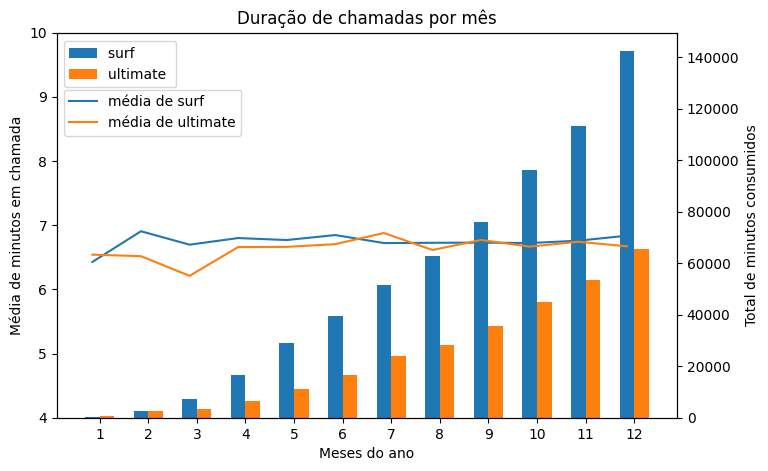

In [28]:
# Separação de dados
surf_calls = calls_by_plan[calls_by_plan['plan'] == 'surf'].groupby('month')['duration'].sum()
ultimate_calls = calls_by_plan[calls_by_plan['plan'] == 'ultimate'].groupby('month')['duration'].sum()

# Setup do gráfico
fig, ax1 = plt.subplots(figsize = (8,5))
plt.xlabel('Meses do ano')
plt.xticks(ind+width/2, ind)
plt.ylabel('Total de minutos consumidos')

# Plotagem das barras com escala 100:1
plt.title('Duração de chamadas por mês')
ax1.bar(ind, surf_calls, width = width, label='surf ')
ax1.bar(ind + width, ultimate_calls, width = width, label='ultimate ')
plt.legend(loc=3, bbox_to_anchor=(0,0.84))

# Plotagem das médias
ax2 = ax1.twinx()
ax2.tick_params(axis='y')
ax2.plot(ind, surf_calls_mean, label='média de surf ') 
ax2.plot(ind, ultimate_calls_mean, label='média de ultimate') 
plt.legend(loc=2, bbox_to_anchor=(0,0.87))
plt.ylabel('Média de minutos em chamada')
plt.ylim([4,10])

# Invertendo a posição das labels
ax2.yaxis.set_label_position("left") 
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

plt.show()

Com este gráfico podemos ver o crescimento do numero de minutos consumidos pelos usuários conforme o ano, vemos também a discrepância entre os planos e temos as médias da duração de chamadas, como base comparativa.
Ao ver que a média do numero de chamadas permanece similar, mas o numero total de minutos aumenta, concluimos que devem haver novos usuários se inscrevendo aos planos.

No handles with labels found to put in legend.


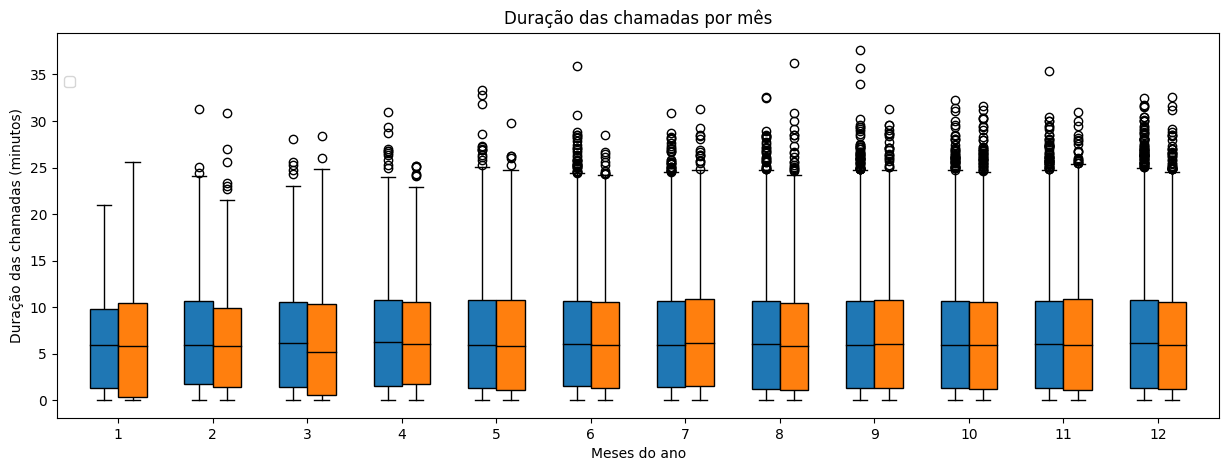

In [29]:
surf_calls_list = [calls_by_plan[(calls_by_plan['month'] == i) & (calls_by_plan['plan'] == 'surf')]['duration'] for i in range(1,13)]
ultimate_calls_list = [calls_by_plan[(calls_by_plan['month'] == i) & (calls_by_plan['plan'] == 'ultimate')]['duration'] for i in range(1,13)]

# Setup do gráfico
plt.figure(figsize = (15,5))
plt.xlabel('Meses do ano')
plt.ylabel('Duração das chamadas (minutos)')

# Plotagem das barras
plt.title('Duração das chamadas por mês')
bplot_surf = plt.boxplot(positions = ind, x = surf_calls_list, widths = width, patch_artist = True)
bplot_ultimate = plt.boxplot(positions = ind + width, x = ultimate_calls_list, widths = width, patch_artist = True)
plt.legend(loc=3, bbox_to_anchor=(0,0.84))
plt.xticks(ind+width/2, ind)

# Colorindo
for patch in bplot_surf['medians']:
    patch.set_color('black')
for patch in bplot_ultimate['medians']:
    patch.set_color('black')
for patch in bplot_surf['boxes']:
    patch.set_facecolor('tab:blue')
for patch in bplot_ultimate['boxes']:
    patch.set_facecolor('tab:orange')

plt.show()


[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

  Esse boxplot evidencia que a média, assim como os intervalos interquartis permanecem muito estáveis durante o ano, mostrando que os clientes não variaram muito a duração média de suas chamadas.
        
A mediana mostra pouca variação, porém nota-se que existem alguns relatos de chamadas mais longas no final do ano. todavia estes resultados estão fora do intervalo Q3+1.5IQR (outliers)

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Vamos ter que rever todas as sessões após os ajustes nos joins, mas olhando aqui as chamadas, seria muito importante que garantisse em ambas as visualizações que comparássemos os planos lado a lado como no exemplo abaixo:

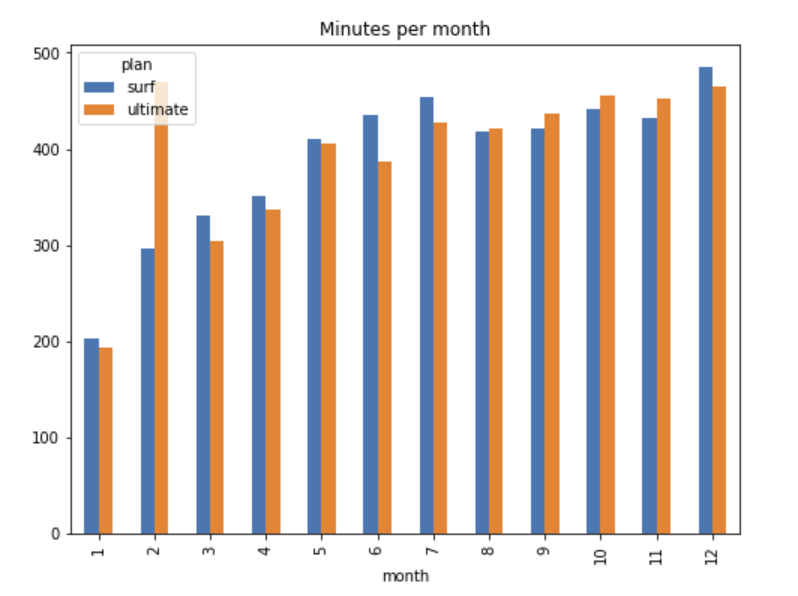

Com isso fica mais fácil comparar os planos.

Extenda esse racional para as demais dimensões posteriores (mensagens, internet e receita).


Retomaremos a revisão deste ponto.
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Excelente trabalho!
    
Todas as visualizações solicitadas para as chamadas estão presentes e acompanhadas da conclusão sobre o comportamento ilustrado!
    
Muito bom!
</div>


### Mensagens

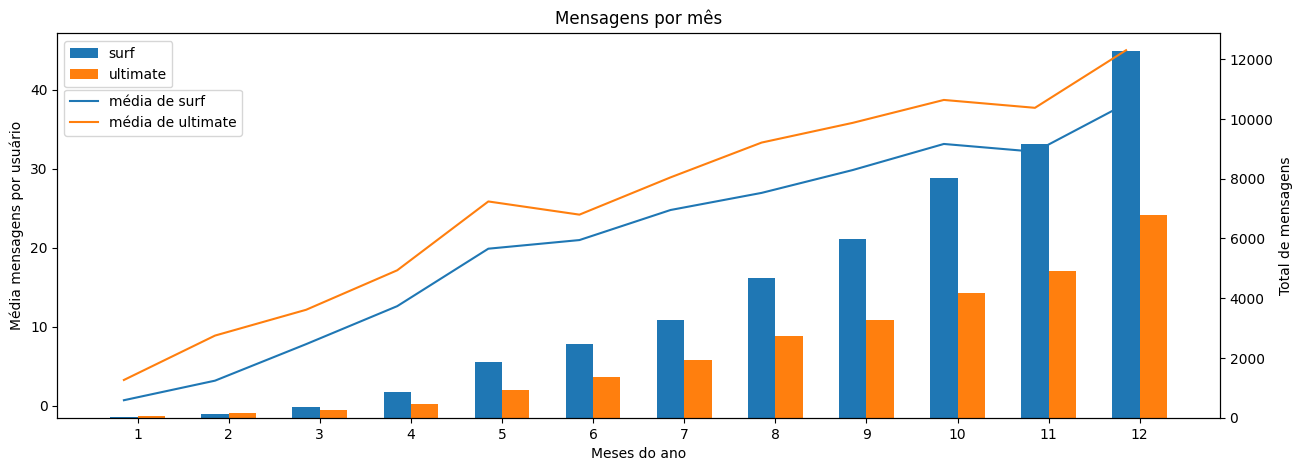

In [30]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

# Separação de dados
messages_by_plan = df_messages.merge(df_users[['plan', 'user_id']], on = 'user_id')
    # Contagem de usuários a cada mês
surf_users = df_megaline[df_megaline['plan'] == 'surf'].groupby('month')['user_id'].count()
ultimate_users = df_megaline[df_megaline['plan'] == 'ultimate'].groupby('month')['user_id'].count()
    # Contagem de mensagens a cada mês
surf_msgs = messages_by_plan[messages_by_plan['plan'] == 'surf'].groupby('month')['id'].count()
ultimate_msgs = messages_by_plan[messages_by_plan['plan'] == 'ultimate'].groupby('month')['id'].count()
    # Média de mensagens por usuário a cada mês
surf_msgs_mean = surf_msgs/surf_users
ultimate_msgs_mean = ultimate_msgs/ultimate_users

# Setup do gráfico
fig, ax1 = plt.subplots(figsize = (15,5))
plt.xlabel('Meses do ano')
plt.xticks(ind+width/2, ind)
plt.ylabel('Total de mensagens')

# Plotagem das barras
plt.title('Mensagens por mês')
ax1.bar(ind, surf_msgs, width = width, label='surf')
ax1.bar(ind + width, ultimate_msgs, width = width, label='ultimate')
plt.ylim()
plt.legend(loc=3, bbox_to_anchor=(0,0.84))

# Plotagem das médias
ax2 = ax1.twinx()
ax2.tick_params(axis='y')
ax2.plot(ind, surf_msgs_mean, label='média de surf ') 
ax2.plot(ind, ultimate_msgs_mean, label='média de ultimate')
plt.ylabel('Média mensagens por usuário')
plt.legend(loc=2, bbox_to_anchor=(0,0.87))

# Invertendo a posição das labels
ax2.yaxis.set_label_position("left") 
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

plt.show()

### Internet

médias mensais:
 month
1     372.134500
2     380.474234
3     400.019023
4     369.091347
5     364.995080
6     368.003246
7     369.396302
8     372.441254
9     369.804879
10    370.669326
11    366.145159
12    363.480058
Name: mb_used, dtype: float64
total mensal:
 month
1       37422.09
2      229511.25
3      526803.34
4      937764.90
5     1555209.32
6     2205130.62
7     2995155.59
8     3985688.81
9     4678146.45
10    5969717.07
11    6787287.04
12    8532927.23
Name: mb_used, dtype: float64


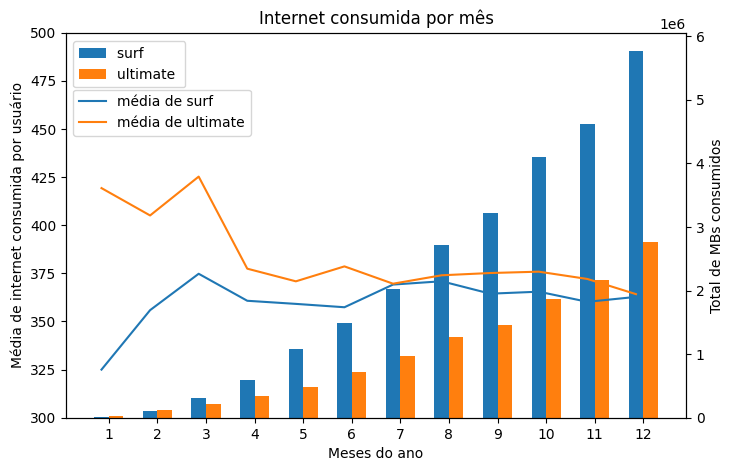

In [31]:
# Separação de dados
internet_by_plan = df_internet.merge(df_users[['plan', 'user_id']], on = 'user_id')
surf_internet = internet_by_plan[internet_by_plan['plan'] == 'surf'].groupby('month')['mb_used'].sum()
ultimate_internet = internet_by_plan[internet_by_plan['plan'] == 'ultimate'].groupby('month')['mb_used'].sum()
surf_internet_mean = internet_by_plan[internet_by_plan['plan'] == 'surf'].groupby('month')['mb_used'].mean()
ultimate_internet_mean = internet_by_plan[internet_by_plan['plan'] == 'ultimate'].groupby('month')['mb_used'].mean()

# Setup do gráfico
fig, ax1 = plt.subplots(figsize = (8,5))
plt.xlabel('Meses do ano')
plt.xticks(ind+width/2, ind)
plt.ylabel('Total de MBs consumidos')

# Plotagem das barras
plt.title('Internet consumida por mês')
ax1.bar(ind, surf_internet, width = width, label='surf ')
ax1.bar(ind + width, ultimate_internet, width = width, label='ultimate ')
plt.legend(loc=3, bbox_to_anchor=(0,0.84))

# Plotagem das médias
ax2 = ax1.twinx()
ax2.tick_params(axis='y')
ax2.plot(ind, surf_internet_mean, label='média de surf')
ax2.plot(ind, ultimate_internet_mean, label='média de ultimate')
plt.ylabel('Média de internet consumida por usuário')
plt.legend(loc=2, bbox_to_anchor=(0,0.87))
plt.ylim([300, 500])

# Invertendo a posição das labels
ax2.yaxis.set_label_position("left") 
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

# imprimindo
print('médias mensais:\n',(surf_internet_mean + ultimate_internet_mean ) /2)
print('total mensal:\n', surf_internet+ultimate_internet)
plt.show()

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

Enquanto a média de consumo de internet dos usuários do plano `ultimate` seja, quase o ano inteiro, superior que a do outro plano, pode-se perceber que, no total, mais internet é consumida com o plano `surf` (o que se dá à quantidade de usuários que assinam o `surf`)

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Mensagens e internet tiveram o seu comportamento investigado conforme solicitado na lição, com gráficos e conclusão apresentados.
</div>


## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

In [32]:
mean_rev = df_megaline.groupby( by = ['plan_name', 'month'])['monthly_revenue'].mean()
rev_sum = df_megaline.groupby( by = ['plan_name', 'month'])['monthly_revenue'].sum()
print('médias mensais:\n',mean_rev)
print('total mensal:\n', rev_sum)

médias mensais:
 plan_name  month
surf       1        20.000000
           2        23.773841
           3        33.181689
           4        34.822246
           5        42.549537
           6        43.985310
           7        58.703447
           8        60.802052
           9        56.810084
           10       64.115993
           11       57.364752
           12       69.634438
ultimate   1        70.000000
           2        70.000000
           3        72.800000
           4        72.333333
           5        70.583333
           6        71.350877
           7        71.671642
           8        72.475610
           9        71.923077
           10       72.268519
           11       71.669231
           12       73.291391
Name: monthly_revenue, dtype: float64
total mensal:
 plan_name  month
surf       1          600.0000
           2          808.3106
           3         1493.1760
           4         2402.7350
           5         3957.1069
           6         

In [33]:
total_per_plan = rev_sum.groupby('plan_name').sum()
users_per_plan = df_users.groupby('plan')['user_id'].count()
print('total por plano:\n', total_per_plan)
print('total de usuários por plano:\n', users_per_plan)
print('média anual por plano por usuário: ', total_per_plan/users_per_plan)

total por plano:
 plan_name
surf        98254.9156
ultimate    58016.0000
Name: monthly_revenue, dtype: float64
total de usuários por plano:
 plan
surf        339
ultimate    161
Name: user_id, dtype: int64
média anual por plano por usuário:  plan_name
surf        289.837509
ultimate    360.347826
dtype: float64


<Figure size 1000x500 with 0 Axes>

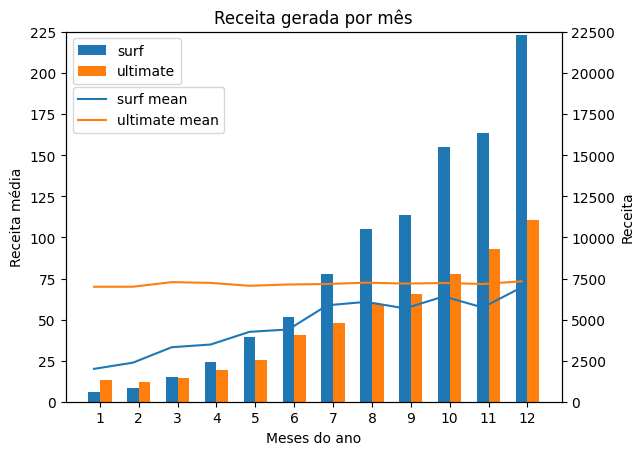

In [34]:
# Separação de dados
surf = rev_sum['surf']
ultimate = rev_sum['ultimate']
surf_mean = mean_rev['surf']
ultimate_mean = mean_rev['ultimate']

# Setup do gráfico
plt.figure(figsize = (10,5))
fig, ax1 = plt.subplots()
plt.xlabel('Meses do ano')
plt.xticks(ind+width/2, ind)
plt.ylabel('Receita')

# Plotagem das barras com escala 100:1
plt.title('Receita gerada por mês')
plt.bar(ind, surf, width = width, label='surf')
plt.bar(ind + width, ultimate, width = width, label='ultimate')
plt.legend(loc=3, bbox_to_anchor=(0,0.84))
plt.ylim([0,22500])

# Plotagem das linhas de médias
ax2 = ax1.twinx()
ax2.tick_params(axis='y')
ax2.plot(ind, surf_mean, label='surf mean')
ax2.plot(ind, ultimate_mean, label='ultimate mean')
plt.ylabel('Receita média')
plt.ylim([0,225])
plt.legend(loc=2, bbox_to_anchor=(0,0.87))

# Invertendo a posição das labels
ax2.yaxis.set_label_position("left") 
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

plt.show()

[Formule conclusões sobre como a receita difere entre os planos.]

Os usuários do plano `ultimate` investem mais dinheiro individualmente do que os usuários do `surf`, o que pode ser visto nas médias de receita por usuário. Porém o plano mais popular é o que mais retorna dinheiro.

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Receita foi investigada adequadamente!
</div>


## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [35]:
null_hyp = 'Hipótese nula: Não há diferença entre a receita média dos planos.'
alt_hyp = 'Hipótese alternativa: Há diferença entre a receita média dos planos.'

alpha = .05

surf_revenue = df_megaline.query('plan_name == "surf"')['monthly_revenue']
ultimate_revenue = df_megaline.query('plan_name == "ultimate"')['monthly_revenue']

In [36]:
# Teste as hipóteses
test = st.ttest_ind(surf_revenue,ultimate_revenue, equal_var = False)
if test.pvalue < alpha:
    print ('Rejeita-se a hipótese de que a receita média é a mesma\n',alt_hyp)
else:
    print ('Não se rejeita a hipótese nula\n',null_hyp)

Rejeita-se a hipótese de que a receita média é a mesma
 Hipótese alternativa: Há diferença entre a receita média dos planos.


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [37]:
df_megaline = df_megaline.merge(df_users[['user_id', 'area']], on = 'user_id')

In [38]:
# Teste as hipóteses
null_hyp = 'Hipótese nula: Não há diferença entre a receita média dos usuários da área.'
alt_hyp = 'Hipótese alternativa: Há diferença entre a receita média dos usuários da área.'

NY_NJ_rev = df_megaline.query('area == "NY-NJ-PA MSA"')['monthly_revenue']
else_rev = df_megaline.query('area != "NY-NJ-PA MSA"')['monthly_revenue']

In [39]:
test = st.ttest_ind(NY_NJ_rev,else_rev, equal_var = False)
if test.pvalue < alpha:
    print ('Rejeita-se a hipótese de que a receita média é a mesma\n',alt_hyp)
else:
    print ('Não se rejeita a hipótese nula\n',null_hyp)

Rejeita-se a hipótese de que a receita média é a mesma
 Hipótese alternativa: Há diferença entre a receita média dos usuários da área.


In [41]:
test.pvalue

0.020680155174918752


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

O teste foi formulado, implementado e analisado corretamente. Muito bom!
</div>


## Conclusão geral

[Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

Concluo que o plano `surf` é o que mais traz receita para a empresa, porém o plano `ultimate` tem maior receita média, o que seria vantajoso se não por sua baixa popularidade em comparação à outra opção.
Por meio do gráfico abaixo, evidencio o crescimento do número de clientes da empresa quando comparando o primeiro semestre com o segundo e, também, demonstro a distribuição da receita gerada por estes clientes.

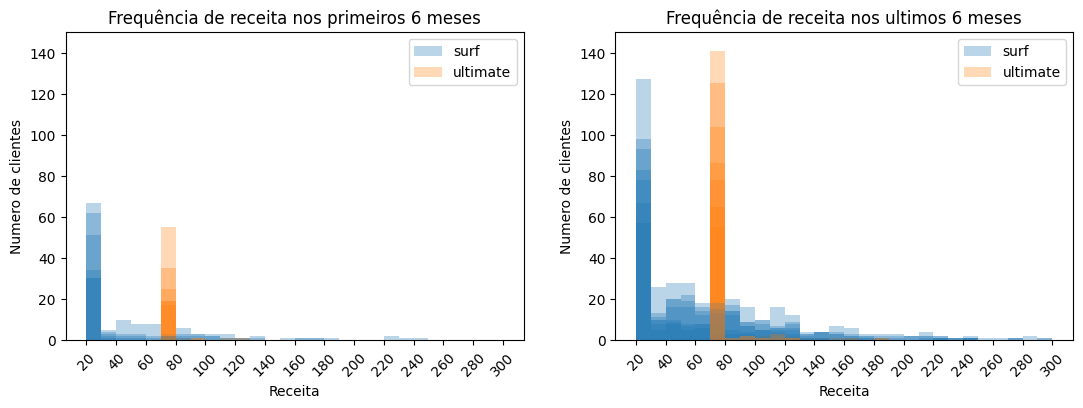

In [40]:
# Separando df entre os dois planos
surf_ind = df_megaline.query('plan_name == "surf"')[['month', 'monthly_revenue']]
ultimate_ind = df_megaline.query('plan_name == "ultimate"')[['month', 'monthly_revenue']]
# Criando variáveis para configurar o gráfico
bins = np.arange(20,310,10)
ticks = np.arange(20,320,20)
ylim = [0,150]

# Ajustando tamanho da figura
plt.figure(figsize = [13,4])
# Plotando o primeiro gráfico
plt.subplot(1, 2, 1)
for x in range(1,7):
    surf_ind.query('month == @x')['monthly_revenue'].plot(kind='hist', alpha = 0.3, bins = bins, color = 'tab:blue')
    ultimate_ind.query('month == @x')['monthly_revenue'].plot(kind='hist', alpha = 0.3, bins = bins,color = 'tab:orange')
# Legendando o primeiro gráfico
plt.xticks(ticks = ticks, rotation = 45)
plt.ylim(ylim)
plt.xlabel('Receita')
plt.ylabel('Numero de clientes')
plt.legend(['surf', 'ultimate'])
plt.title('Frequência de receita nos primeiros 6 meses')

# Plotando o segundo gráfico
plt.subplot(1, 2, 2)
for x in range(6,13):
    surf_ind.query('month == @x')['monthly_revenue'].plot(kind='hist', alpha = 0.3, bins = bins, color = 'tab:blue')
    ultimate_ind.query('month == @x')['monthly_revenue'].plot(kind='hist', alpha = 0.3, bins = bins,color = 'tab:orange')
# Legendando o segundo gráfico
plt.xticks(ticks = ticks, rotation = 45)
plt.ylim(ylim)
plt.xlabel('Receita')
plt.ylabel('Numero de clientes')
plt.legend(['surf', 'ultimate'])
plt.title('Frequência de receita nos ultimos 6 meses')

plt.show()